In [1]:
from pathlib import Path
from glob import glob
import numpy as np
from sherpa.astro import ui
from sherpa.astro import datastack as ds
import sherpa

from astropy.io import fits
from astropy.table import Table
import astropy.units as u

import ChiantiPy.core as ch

 ChiantiPy version 0.9.5 
 found PyQt5 widgets
 using PyQt5 widgets


In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Monkey patch a sherpa bug for loading multiple response files
# see https://cxc.harvard.edu/sherpa/threads/grating_hrcsletg/
import numpy
from sherpa.models.model import CompositeModel
from sherpa.astro.instrument import MultiResponseSumModel

def startup_monkey(self, cache):
    pha = self.pha
    if numpy.iterable(pha.mask):
        pha.notice_response(True)
    self.channel = pha.get_noticed_channels()
    self.mask = pha.get_mask()
    self._get_noticed_energy_list()
    CompositeModel.startup(self, cache)

MultiResponseSumModel.startup = startup_monkey

In [4]:
path = 'data/Chandra/tgcat/obs_6443_tgid_2459/'
ui.load_data(path + 'pha2.gz')
for sign, sherpaid in zip(['-', ''], [1, 2]):
    for num in [1,2,3]:
        ui.load_arf(sherpaid, path+"leg_{}{}.arf.gz".format(sign, num), num)
        ui.load_rmf(sherpaid, path+"leg_{}{}.rmf.gz".format(sign, num), num)
        
ui.copy_data(1, '6443_leg-1')
ui.copy_data(2, '6443_leg+1')

statistical errors were found in file 'data/Chandra/tgcat/obs_6443_tgid_2459/pha2.gz' 
but not used; to use them, re-read with use_errors=True
read background file data/Chandra/tgcat/obs_6443_tgid_2459/pha2_bg
read background_up into a dataset from file data/Chandra/tgcat/obs_6443_tgid_2459/pha2.gz
read background_down into a dataset from file data/Chandra/tgcat/obs_6443_tgid_2459/pha2.gz
Multiple data sets have been input: 1-2


In [5]:
# LEG / ACIS
path = 'data/Chandra/tgcat/obs_13250_tgid_3371/'
ui.load_data(path + 'pha2.gz')
for sign, sherpaid in zip(['-', ''], [3, 4]):
    ui.load_arf(sherpaid, path+"leg_{}1.arf.gz".format(sign))
    ui.load_rmf(sherpaid, path+"leg_{}1.rmf.gz".format(sign))
        
ui.copy_data(3, '13250_leg-1')
ui.copy_data(4, '13250_leg+1')

statistical errors were found in file 'data/Chandra/tgcat/obs_13250_tgid_3371/pha2.gz' 
but not used; to use them, re-read with use_errors=True
read background_up into a dataset from file data/Chandra/tgcat/obs_13250_tgid_3371/pha2.gz
read background_down into a dataset from file data/Chandra/tgcat/obs_13250_tgid_3371/pha2.gz
Multiple data sets have been input: 1-6


In [6]:
# HEG / ACIS

hegobsids = ['5', '7435', '7436', '7437', '7438']
hegdirs = ['obs_5_tgid_4988', 'obs_7435_tgid_4053', 'obs_7436_tgid_4054', 'obs_7437_tgid_4057', 'obs_7438_tgid_4055']
for h, hd in zip(hegobsids, hegdirs):
    path = 'data/Chandra/tgcat/' + hd + '/'
    ui.load_data(path + 'pha2.gz')

    ui.load_arf(3, path+"heg_-1.arf.gz")
    ui.load_rmf(3, path+"heg_-1.rmf.gz")
    ui.load_arf(4, path+"heg_1.arf.gz")
    ui.load_rmf(4, path+"heg_1.rmf.gz")
    ui.load_arf(9, path+"meg_-1.arf.gz")
    ui.load_rmf(9, path+"meg_-1.rmf.gz")
    ui.load_arf(10, path+"meg_1.arf.gz")
    ui.load_rmf(10, path+"meg_1.rmf.gz")
        
    ui.copy_data(3, h + '_heg-1')
    ui.copy_data(4, h + '_heg+1')
    ui.copy_data(9, h + '_meg-1')
    ui.copy_data(10, h + '_meg+1')

statistical errors were found in file 'data/Chandra/tgcat/obs_5_tgid_4988/pha2.gz' 
but not used; to use them, re-read with use_errors=True
read background_up into a dataset from file data/Chandra/tgcat/obs_5_tgid_4988/pha2.gz
read background_down into a dataset from file data/Chandra/tgcat/obs_5_tgid_4988/pha2.gz
Multiple data sets have been input: 1-12
statistical errors were found in file 'data/Chandra/tgcat/obs_7435_tgid_4053/pha2.gz' 
but not used; to use them, re-read with use_errors=True
read background_up into a dataset from file data/Chandra/tgcat/obs_7435_tgid_4053/pha2.gz
read background_down into a dataset from file data/Chandra/tgcat/obs_7435_tgid_4053/pha2.gz
Multiple data sets have been input: 1-12
statistical errors were found in file 'data/Chandra/tgcat/obs_7436_tgid_4054/pha2.gz' 
but not used; to use them, re-read with use_errors=True
read background_up into a dataset from file data/Chandra/tgcat/obs_7436_tgid_4054/pha2.gz
read background_down into a dataset from fil

In [7]:
# XMM
path = 'data/XMM/0112880201/pps/'
ui.load_data('XMM_R1', path + 'P0112880201R1S004SRSPEC1003.FTZ')
ui.load_data('XMM_R2', path + 'P0112880201R2S005SRSPEC1003.FTZ')
ui.load_rmf('XMM_R1', path + 'P0112880201R1S004RSPMAT1003.FTZ')
ui.load_rmf('XMM_R2', path + 'P0112880201R2S005RSPMAT1003.FTZ')

statistical errors were found in file 'data/XMM/0112880201/pps/P0112880201R1S004SRSPEC1003.FTZ' 
but not used; to use them, re-read with use_errors=True
statistical errors were found in file 'data/XMM/0112880201/pps/P0112880201R2S005SRSPEC1003.FTZ' 
but not used; to use them, re-read with use_errors=True


In [8]:
ui.set_analysis('wave')

In [ ]:
ui.ignore(None, 21.4)
ui.ignore(22.3, None)
ui.notice(21.4, 22.3)

In [ ]:
ui.set_stat('cstat')

In [ ]:
bkg = ui.xsbbody(name='bkg')
line_r = ui.delta1d(name='r')
line_i = ui.delta1d(name='i')
line_f = ui.delta1d(name='f')

In [9]:
bkg = ui.xsconstant(name='bkg')

line_r = ui.xsgaussian(name='r')
line_i = ui.xsgaussian(name='i')
line_f = ui.xsgaussian(name='f')

In [10]:
line_r.Sigma.val = 0.00001
line_r.Sigma.frozen = True
line_r.LineE = 0.5740
line_r.LineE.frozen = True

line_i.Sigma.val = 0.00001
line_i.Sigma.frozen = True
line_i.LineE = 0.5686
line_i.LineE.frozen = True

line_f.Sigma.val = 0.00001
line_f.Sigma.frozen = True
line_f.LineE = 0.5610
line_f.LineE.frozen = True

In [11]:
# Ne IX
line_r.LineE = 0.9220
line_i.LineE = 0.9148
line_f.LineE = 0.9051

ui.ignore(None, 13.40)
ui.ignore(13.75, None)
ui.notice(13.40, 13.75)

In [12]:
idnames = [['5_meg+1', '5_meg-1'],
           ['XMM_R2'],
           ['6443_leg+1', '6443_leg-1'],
           ['7435_meg+1', '7435_meg-1'],
           ['7436_meg+1', '7436_meg-1'],
           ['7437_meg+1', '7437_meg-1'],
           ['7438_meg+1', '7438_meg-1'],
           ['13250_leg+1',  '13250_leg-1'],
          ]
obsids = [o[0].split('_')[0] for o in idnames]

In [13]:
def fitlines(names, model):
    for n in names:
        ui.set_source(n, model)
        #ui.group_width(n, 1)
        #ui.group_counts(n, 5)
    ui.fit(*names)
    ui.conf(*names)
    cov = ui.get_conf_results()
    ui.plot_fit(names[0])
    ax = plt.gca()
    ax.set_title(names[0])
    return np.array([cov.parvals, cov.parmins, cov.parmaxes], dtype=np.floating), (plt.gcf(), ax)

Datasets              = '5_meg+1', '5_meg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 8.7615e+12
Final fit statistic   = 73.2248 at function evaluation 15
Data points           = 142
Degrees of freedom    = 138
Probability [Q-value] = 0.999999
Reduced statistic     = 0.530614
Change in statistic   = 8.7615e+12
   bkg.factor     9.27576e-07  +/- 3.66138e-07 
   r.norm         0.000135978  +/- 1.43649e-05 
   i.norm         9.10113e-05  +/- 1.27634e-05 
   f.norm         4.22373e-05  +/- 1.09673e-05 
bkg.factor lower bound:	-3.66196e-07
r.norm lower bound:	-1.43649e-05
i.norm lower bound:	-1.27634e-05
f.norm lower bound:	-1.09673e-05
bkg.factor upper bound:	3.66196e-07
r.norm upper bound:	1.43649e-05
i.norm upper bound:	1.27634e-05
f.norm upper bound:	1.09673e-05
Datasets              = '5_meg+1', '5_meg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
co

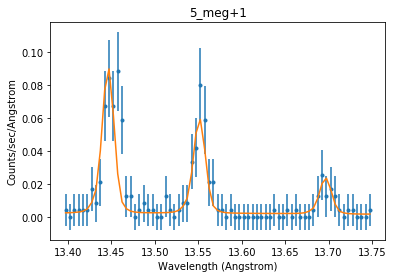

Dataset               = XMM_R2
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 138.115
Final fit statistic   = 33.1815 at function evaluation 11
Data points           = 36
Degrees of freedom    = 32
Probability [Q-value] = 0.40939
Reduced statistic     = 1.03692
Change in statistic   = 104.933
   bkg.factor     2.36098e-06  +/- 1.3794e-06  
   r.norm         0.000230094  +/- 2.94411e-05 
   i.norm         0.00017602   +/- 2.85494e-05 
   f.norm         4.54826e-05  +/- 2.60836e-05 
bkg.factor lower bound:	-1.37944e-06
r.norm lower bound:	-2.94407e-05
i.norm lower bound:	-2.8549e-05
f.norm lower bound:	-2.60831e-05
r.norm upper bound:	2.94407e-05
f.norm upper bound:	2.60831e-05
bkg.factor upper bound:	1.37944e-06
i.norm upper bound:	2.8549e-05
Dataset               = XMM_R2
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   P

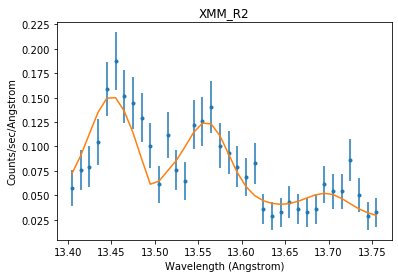

Datasets              = '6443_leg+1', '6443_leg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 181.214
Final fit statistic   = 125.25 at function evaluation 11
Data points           = 58
Degrees of freedom    = 54
Probability [Q-value] = 1.3724e-07
Reduced statistic     = 2.31944
Change in statistic   = 55.9645
   bkg.factor     3.78216e-06  +/- 5.88542e-07 
   r.norm         0.000214788  +/- 1.06869e-05 
   i.norm         0.000135732  +/- 9.55183e-06 
   f.norm         7.32046e-05  +/- 8.14319e-06 
bkg.factor lower bound:	-5.88572e-07
r.norm lower bound:	-1.06869e-05
i.norm lower bound:	-9.55183e-06
f.norm lower bound:	-8.14318e-06
bkg.factor upper bound:	5.88572e-07
r.norm upper bound:	1.06869e-05
i.norm upper bound:	9.55183e-06
f.norm upper bound:	8.14318e-06
Datasets              = '6443_leg+1', '6443_leg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrel

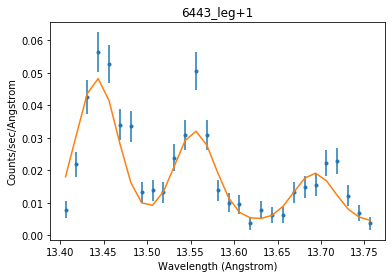

Datasets              = '7435_meg+1', '7435_meg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 777.457
Final fit statistic   = 88.3154 at function evaluation 11
Data points           = 142
Degrees of freedom    = 138
Probability [Q-value] = 0.999675
Reduced statistic     = 0.639967
Change in statistic   = 689.142
   bkg.factor     5.07614e-07  +/- 1.71621e-07 
   r.norm         0.000125049  +/- 9.34886e-06 
   i.norm         9.56437e-05  +/- 7.90775e-06 
   f.norm         4.37883e-05  +/- 5.71013e-06 
bkg.factor lower bound:	-1.71622e-07
r.norm lower bound:	-9.34887e-06
i.norm lower bound:	-7.90775e-06
f.norm lower bound:	-5.71013e-06
bkg.factor upper bound:	1.71622e-07
r.norm upper bound:	9.34887e-06
i.norm upper bound:	7.90775e-06
f.norm upper bound:	5.71013e-06
Datasets              = '7435_meg+1', '7435_meg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehr

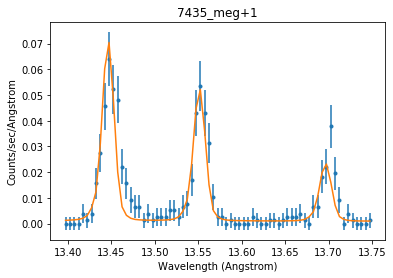

Datasets              = '7436_meg+1', '7436_meg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 149.717
Final fit statistic   = 108.113 at function evaluation 11
Data points           = 142
Degrees of freedom    = 138
Probability [Q-value] = 0.971761
Reduced statistic     = 0.783426
Change in statistic   = 41.6045
   bkg.factor     5.96572e-07  +/- 1.73502e-07 
   r.norm         0.00018683   +/- 1.05849e-05 
   i.norm         0.000110212  +/- 8.62401e-06 
   f.norm         5.23935e-05  +/- 6.12313e-06 
bkg.factor lower bound:	-1.73529e-07
r.norm lower bound:	-1.05849e-05
i.norm lower bound:	-8.62401e-06
f.norm lower bound:	-6.12313e-06
bkg.factor upper bound:	1.73529e-07
r.norm upper bound:	1.05849e-05
i.norm upper bound:	8.62401e-06
f.norm upper bound:	6.12313e-06
Datasets              = '7436_meg+1', '7436_meg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehr

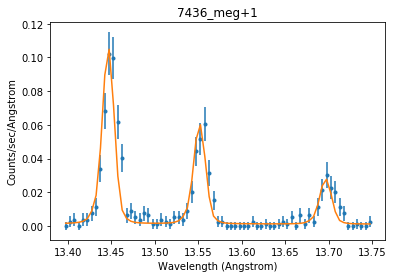

Datasets              = '7437_meg+1', '7437_meg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 124.365
Final fit statistic   = 94.376 at function evaluation 11
Data points           = 142
Degrees of freedom    = 138
Probability [Q-value] = 0.998289
Reduced statistic     = 0.683884
Change in statistic   = 29.9891
   bkg.factor     6.28053e-07  +/- 1.74609e-07 
   r.norm         0.000138639  +/- 9.43596e-06 
   i.norm         9.91592e-05  +/- 8.37233e-06 
   f.norm         4.45535e-05  +/- 5.81341e-06 
bkg.factor lower bound:	-1.7462e-07
r.norm lower bound:	-9.43597e-06
i.norm lower bound:	-8.37234e-06
f.norm lower bound:	-5.81341e-06
bkg.factor upper bound:	1.7462e-07
r.norm upper bound:	9.43597e-06
i.norm upper bound:	8.37234e-06
f.norm upper bound:	5.81341e-06
Datasets              = '7437_meg+1', '7437_meg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels

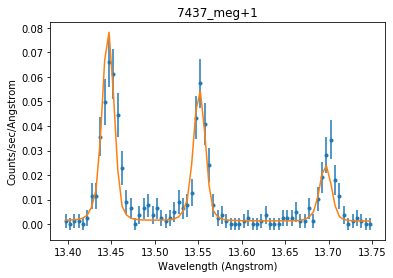

Datasets              = '7438_meg+1', '7438_meg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 21.24
Final fit statistic   = 19.2261 at function evaluation 11
Data points           = 142
Degrees of freedom    = 138
Probability [Q-value] = 1
Reduced statistic     = 0.13932
Change in statistic   = 2.0139
   bkg.factor     4.02375e-07  +/- 1.06982e-06 
   r.norm         0.000181258  +/- 3.74694e-05 
   i.norm         0.000124775  +/- 3.37593e-05 
   f.norm         3.61887e-05  +/- 2.36624e-05 
bkg.factor lower bound:	-----
f.norm lower bound:	-2.36624e-05
bkg.factor upper bound:	1.06994e-06
i.norm lower bound:	-3.37412e-05
r.norm lower bound:	-3.7458e-05
i.norm upper bound:	3.37593e-05
r.norm upper bound:	3.74694e-05
f.norm upper bound:	2.37767e-05
Datasets              = '7438_meg+1', '7438_meg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-si

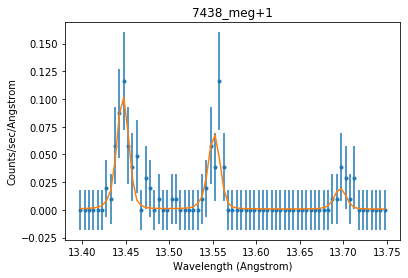

Datasets              = '13250_leg+1', '13250_leg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 34.9786
Final fit statistic   = 22.9281 at function evaluation 11
Data points           = 58
Degrees of freedom    = 54
Probability [Q-value] = 0.999936
Reduced statistic     = 0.424595
Change in statistic   = 12.0505
   bkg.factor     3.82542e-06  +/- 1.54696e-06 
   r.norm         0.000207302  +/- 2.78436e-05 
   i.norm         7.94408e-05  +/- 2.10563e-05 
   f.norm         4.30654e-05  +/- 1.86292e-05 
bkg.factor lower bound:	-1.54724e-06
r.norm lower bound:	-2.78437e-05
i.norm lower bound:	-2.10563e-05
f.norm lower bound:	-1.86293e-05
bkg.factor upper bound:	1.54724e-06
i.norm upper bound:	2.10563e-05
r.norm upper bound:	2.78437e-05
f.norm upper bound:	1.86293e-05
Datasets              = '13250_leg+1', '13250_leg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2ge

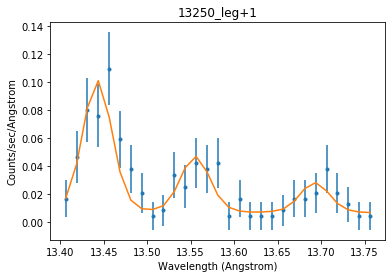

In [14]:
# Ne IX
line_r.LineE = 0.9220
line_i.LineE = 0.9148
line_f.LineE = 0.9051

ui.ignore(None, 13.40)
ui.ignore(13.75, None)
ui.notice(13.40, 13.75)

fits = []
plots = []
for n in idnames:
    f, p = fitlines(n, bkg + line_r + line_i + line_f)
    fits.append(f)
    plots.append(p)
    plt.show()

In [15]:
farr = np.stack(fits)

farr.shape

(8, 3, 4)

Datasets              = '5_meg+1', '5_meg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 1820.98
Final fit statistic   = 8.47501 at function evaluation 9
Data points           = 82
Degrees of freedom    = 80
Probability [Q-value] = 1
Reduced statistic     = 0.105938
Change in statistic   = 1812.51
   bkg.factor     2.63216e-07  +/- 2.22729e-07 
   r.norm         2.31825e-05  +/- 5.55989e-06 
bkg.factor lower bound:	-2.22691e-07
r.norm lower bound:	-5.55989e-06
bkg.factor upper bound:	2.22691e-07
r.norm upper bound:	5.55989e-06
Datasets              = '5_meg+1', '5_meg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   bkg.factor    2.63216e-07 -2.22691e-07  2.22691e-07
   r.norm        2.31825e-05 -5.55989e-06

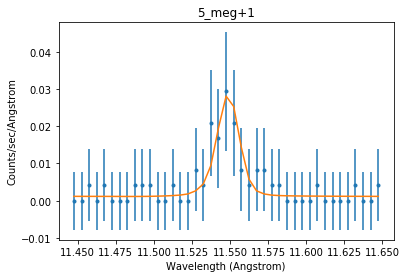

Dataset               = XMM_R2
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 7.57368
Final fit statistic   = 6.63617 at function evaluation 71
Data points           = 21
Degrees of freedom    = 19
Probability [Q-value] = 0.995915
Reduced statistic     = 0.349272
Change in statistic   = 0.937508
   bkg.factor     4.10932e-08  +/- 5.50022e-07 
   r.norm         3.78787e-05  +/- 1.6979e-05  
bkg.factor lower bound:	-----
r.norm lower bound:	-1.6979e-05
bkg.factor upper bound:	5.49893e-07
r.norm upper bound:	1.15715e-05
Dataset               = XMM_R2
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   bkg.factor    4.10932e-08        -----  5.49893e-07
   r.norm        3.78787e-05  -1.6979e-05  1.15715e-05


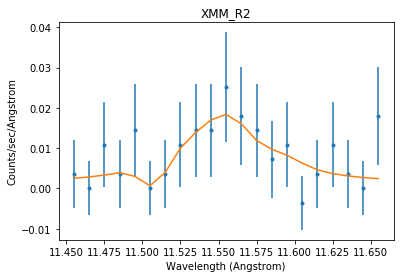

Datasets              = '6443_leg+1', '6443_leg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 58.6056
Final fit statistic   = 17.1971 at function evaluation 7
Data points           = 34
Degrees of freedom    = 32
Probability [Q-value] = 0.984776
Reduced statistic     = 0.537409
Change in statistic   = 41.4085
   bkg.factor     2.52997e-06  +/- 4.06252e-07 
   r.norm         2.58373e-05  +/- 5.848e-06   
bkg.factor lower bound:	-4.06219e-07
r.norm lower bound:	-5.84803e-06
bkg.factor upper bound:	4.06219e-07
r.norm upper bound:	5.84803e-06
Datasets              = '6443_leg+1', '6443_leg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   bkg.factor    2.52997e-06 -4.06219e-07  4.06219e-07
   r.norm        2.583

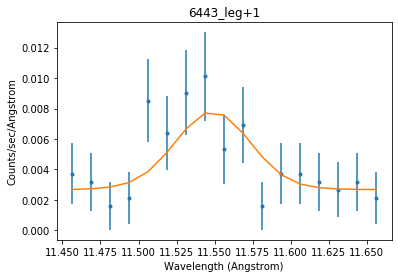

Datasets              = '7435_meg+1', '7435_meg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 781.773
Final fit statistic   = 22.9982 at function evaluation 9
Data points           = 82
Degrees of freedom    = 80
Probability [Q-value] = 1
Reduced statistic     = 0.287477
Change in statistic   = 758.775
   bkg.factor     2.20256e-07  +/- 9.00501e-08 
   r.norm         1.75751e-05  +/- 2.62423e-06 
bkg.factor lower bound:	-9.00445e-08
r.norm lower bound:	-2.62424e-06
bkg.factor upper bound:	9.00445e-08
r.norm upper bound:	2.62424e-06
Datasets              = '7435_meg+1', '7435_meg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   bkg.factor    2.20256e-07 -9.00445e-08  9.00445e-08
   r.norm        1.75751e-05 

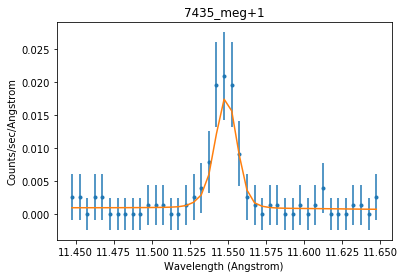

Datasets              = '7436_meg+1', '7436_meg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 31.0228
Final fit statistic   = 25.1926 at function evaluation 7
Data points           = 82
Degrees of freedom    = 80
Probability [Q-value] = 1
Reduced statistic     = 0.314907
Change in statistic   = 5.83021
   bkg.factor     1.48282e-07  +/- 8.72438e-08 
   r.norm         2.46395e-05  +/- 2.93592e-06 
bkg.factor lower bound:	-8.72306e-08
r.norm lower bound:	-2.93592e-06
bkg.factor upper bound:	8.72306e-08
r.norm upper bound:	2.93592e-06
Datasets              = '7436_meg+1', '7436_meg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   bkg.factor    1.48282e-07 -8.72306e-08  8.72306e-08
   r.norm        2.46395e-05 

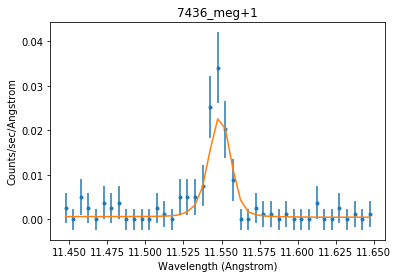

Datasets              = '7437_meg+1', '7437_meg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 27.0466
Final fit statistic   = 26.3923 at function evaluation 7
Data points           = 82
Degrees of freedom    = 80
Probability [Q-value] = 1
Reduced statistic     = 0.329904
Change in statistic   = 0.654209
   bkg.factor     2.20824e-07  +/- 9.02484e-08 
   r.norm         2.37973e-05  +/- 2.92088e-06 
bkg.factor lower bound:	-9.02491e-08
r.norm lower bound:	-2.92088e-06
bkg.factor upper bound:	9.02491e-08
r.norm upper bound:	2.92088e-06
Datasets              = '7437_meg+1', '7437_meg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   bkg.factor    2.20824e-07 -9.02491e-08  9.02491e-08
   r.norm        2.37973e-05

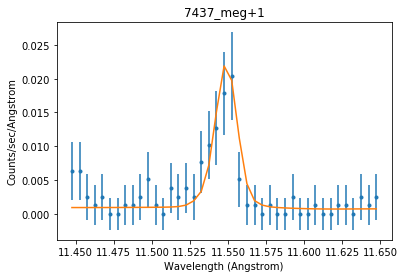

Datasets              = '7438_meg+1', '7438_meg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 2.29486
Final fit statistic   = 2.15128 at function evaluation 69
Data points           = 82
Degrees of freedom    = 80
Probability [Q-value] = 1
Reduced statistic     = 0.026891
Change in statistic   = 0.143581
   bkg.factor     9.3839e-08   +/- 5.80071e-07 
   r.norm         2.11314e-05  +/- 1.1904e-05  
bkg.factor lower bound:	-----
r.norm lower bound:	-1.1904e-05
bkg.factor upper bound:	5.79985e-07
r.norm upper bound:	1.17534e-05
Datasets              = '7438_meg+1', '7438_meg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   bkg.factor     9.3839e-08        -----  5.79985e-07
   r.norm        2.11314e-05  -1.19

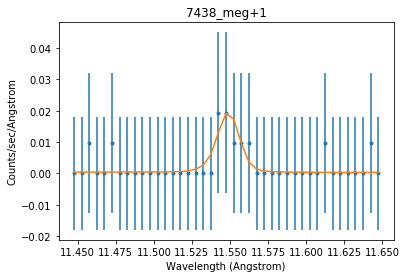

Datasets              = '13250_leg+1', '13250_leg-1'
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 9.15067
Final fit statistic   = 5.59643 at function evaluation 7
Data points           = 34
Degrees of freedom    = 32
Probability [Q-value] = 1
Reduced statistic     = 0.174889
Change in statistic   = 3.55424
   bkg.factor     9.11666e-07  +/- 1.03008e-06 
   r.norm         3.66643e-05  +/- 1.35399e-05 
r.norm lower bound:	-1.35481e-05
bkg.factor lower bound:	-----
r.norm upper bound:	1.35481e-05
bkg.factor upper bound:	1.03003e-06
Datasets              = '13250_leg+1', '13250_leg-1'
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   bkg.factor    9.11666e-07        -----  1.03003e-06
   r.norm        3.66643e-05 -1.

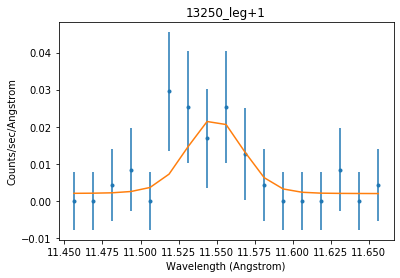

In [16]:
# Ne IX Lyb
line_r.LineE = (11.55 * u.Angstrom).to(u.keV, equivalencies=u.spectral())

ui.ignore(None, 11.45)
ui.ignore(11.65, None)
ui.notice(11.45, 11.65)

fits = []
plots = []
for n in idnames:
    f, p = fitlines(n, bkg + line_r)
    fits.append(f)
    plots.append(p)
    plt.show()

In [17]:
farr2 = np.stack(fits)

farr2.shape

(8, 3, 2)

In [18]:
alpha2beta = farr[:, 0, 1] / farr2[:, 0, 1]
sig_alpha2beta = np.sqrt((farr[:, 2, 1] / farr2[:, 0, 1])**2 + (farr[:, 0, 1] * farr2[:, 2, 1] / farr2[:, 0, 1]**2)**2)

<ErrorbarContainer object of 3 artists>

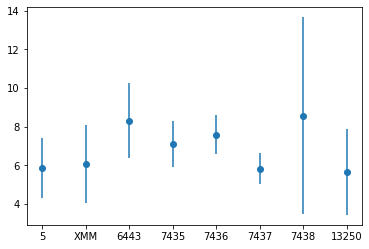

In [19]:
plt.errorbar(obsids, alpha2beta, yerr=sig_alpha2beta, fmt='o')

In [20]:
f2i = farr[:, 0, 3] / farr[:, 0, 2]
sig_f2i = np.sqrt((farr[:, 2, 3] / farr[:, 0, 2])**2 + (farr[:, 0, 3] * farr[:, 2, 2] / farr[:, 0, 2]**2)**2)

In [21]:
fi2r = (farr[:, 0, 3] + farr[:, 0, 2]) / farr[:, 0, 1]
sig_fi2r = np.sqrt((farr[:, 2, 3] / farr[:, 0, 1])**2 + 
                   (farr[:, 2, 2] / farr[:, 0, 1])**2 + 
                   ((farr[:, 0, 3] + farr[:, 0, 2]) * farr[:, 2, 1] / farr[:, 0, 1]**2)**2)

<ErrorbarContainer object of 3 artists>

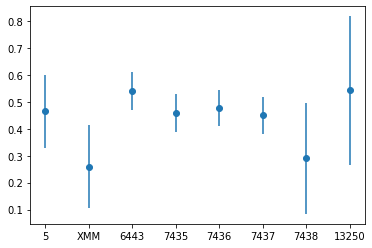

In [22]:
plt.errorbar(obsids, f2i, yerr=sig_f2i, fmt='o')

<ErrorbarContainer object of 3 artists>

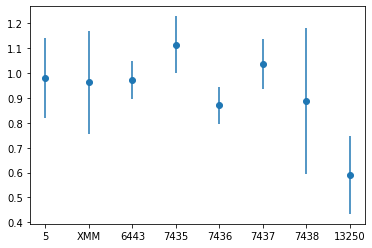

In [23]:
plt.errorbar(obsids, fi2r, yerr=sig_fi2r, fmt='o')

In [25]:
phabs = ui.xsphabs("phabs")

In [196]:
phabs.nH = 1
print(phabs)

xsphabs.phabs
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   phabs.nH     thawed            1            0       100000 10^22 atoms / cm^2


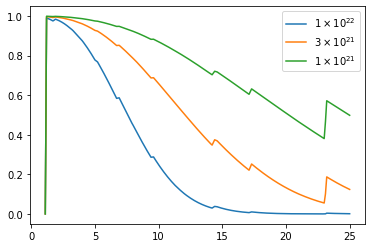

In [200]:
lam = np.arange(25., 1., -.1)
en = 12.4/lam
phabs.nH = 1
plt.plot(lam, phabs(en), label='$1 \\times 10^{22}$')
phabs.nH = .3
plt.plot(lam, phabs(en), label='$3\\times 10^{21}$')
phabs.nH = .1
plt.plot(lam, phabs(en), label='$1 \\times 10^{21}$')

plt.legend()

In [202]:
phabs.nH = .1
np.interp([11.55, 13.45], lam[::-1], phabs(en)[::-1])

array([0.81442499, 0.73597217])

In [203]:
phabs.nH = .3
np.interp([11.55, 13.45], lam[::-1], phabs(en)[::-1])

array([0.5402067 , 0.39865357])

In [204]:
0.81/0.74, 0.54/.40

(1.0945945945945947, 1.35)

In [27]:
print(phabs)

xsphabs.phabs
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   phabs.nH     thawed            1            0       100000 10^22 atoms / cm^2


In [131]:
logtemp = np.arange(6.1, 7.01, .1)
temp = 10**logtemp
ne9 = ch.ion('ne_9', temperature=temp, eDensity=1.e+9, em=1.e+27)
ne9.intensity()

In [132]:
e_lyb = ne9.Emiss['emiss'][(ne9.Emiss['lvl1'] == 1) & (ne9.Emiss['pretty2'] == '1s.3p 1P1.0')].flatten()
e_lya = ne9.Emiss['emiss'][(ne9.Emiss['lvl1'] == 1) & (ne9.Emiss['pretty2'] == '1s.2p 1P1.0')].flatten()

In [207]:
((ne9.Emiss['lvl1'] == 1) & (ne9.Emiss['pretty2'] == '1s.3p 1P1.0')).sum()

1

In [208]:
((ne9.Emiss['lvl1'] == 1) & (ne9.Emiss['pretty2'] == '1s.2p 1P1.0')).sum()

1

Text(0, 0.5, 'ratio Ly$\\alpha$/Ly$\\beta$')

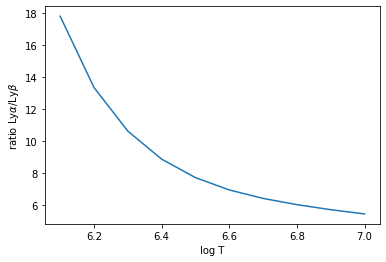

In [210]:
plt.plot(logtemp, e_lya / e_lyb)
plt.xlabel('log T')
plt.ylabel('ratio Ly$\\alpha$/Ly$\\beta$')

In [133]:
e_i1 = ne9.Emiss['emiss'][(ne9.Emiss['lvl1'] == 1) & (ne9.Emiss['pretty2'] == '1s.2p 3P2.0')].flatten()
e_i2 = ne9.Emiss['emiss'][(ne9.Emiss['lvl1'] == 1) & (ne9.Emiss['pretty2'] == '1s.2p 3P1.0')].flatten()
e_f = ne9.Emiss['emiss'][(ne9.Emiss['lvl1'] == 1) & (ne9.Emiss['pretty2'] == '1s.2s 3S1.0')].flatten()

Text(0, 0.5, 'ratio (f+i)/r')

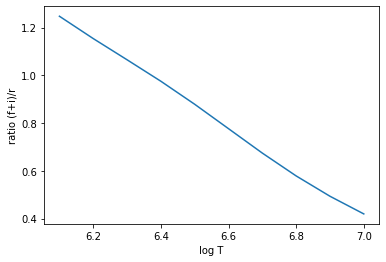

In [211]:
plt.plot(logtemp, (e_i1 + e_i2 + e_f) / e_lya)
plt.xlabel('log T')
plt.ylabel('ratio (f+i)/r')

In [134]:
xp = (e_i1 + e_i2 + e_f) / e_lya
sortind = np.argsort(xp)
xp = xp[sortind]
fp = logtemp[sortind]
t_from_g = np.interp(fi2r, xp, fp)
t_from_g_up = np.interp(fi2r + sig_fi2r, xp, fp) - t_from_g
t_from_g_do = np.interp(fi2r - sig_fi2r, xp, fp) - t_from_g

In [135]:
t_from_g_up

array([-0.18036713, -0.23114159, -0.08413022, -0.12422354, -0.07732173,
       -0.11427005, -0.31872682, -0.1592345 ])

<ErrorbarContainer object of 3 artists>

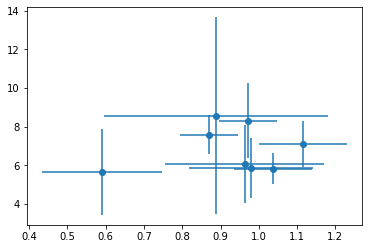

In [136]:
plt.errorbar(fi2r, alpha2beta, xerr=sig_fi2r, yerr=sig_alpha2beta, fmt='o')

In [190]:
phabs = ui.xsphabs("phabs")
phabs.nH = .1
print(phabs)

xsphabs.phabs
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   phabs.nH     thawed          0.1            0       100000 10^22 atoms / cm^2


In [191]:
# Input is "edge of bins", return values are for bin center.
# So need to make a few narrow bins around the range I care.
absval = phabs(([13.46, 13.45, 13.44, 11.56, 11.55, 11.54, 5.]
                * u.Angstrom).to(u.keV, equivalencies=u.spectral()).value)
absval

array([0.7334957, 0.7339343, 0.7721647, 0.8123384, 0.8127275, 0.8900622,
       0.       ], dtype=float32)

In [192]:
abscoeffalpha = - 1e-21 * np.log(absval[2])
abscoeffbeta = - 1e-21 * np.log(absval[4])
abscoeffalpha, abscoeffbeta

(2.5855740904808043e-22, 2.073593884706497e-22)

In [165]:
Gratio, Habobs = np.mgrid[.3:1.4:.01, 3:14:.01]

In [193]:
logT_from_G = np.interp(Gratio, xp, fp)
Hab_from_logT = np.interp(logT_from_G, logtemp, e_lya / e_lyb)

N_H = np.log(Habobs/Hab_from_logT) / (abscoeffbeta - abscoeffalpha) / 1e21

In [230]:
plt.rcParams['axes.prop_cycle'].by_key()['color']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [231]:
obsids

['5', 'XMM', '6443', '7435', '7436', '7437', '7438', '13250']

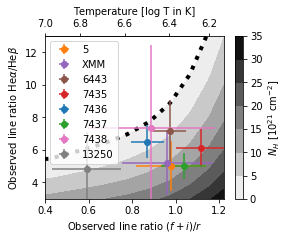

In [232]:
# Define colors so that they match figure 3 in Brickhouse et al. (2012)
# Other colors are taken from default matplotlib color cycle
obscolors = {'5': '#ff7f0e', 
             'XMM': '#9467bd',
             '6443': '#8c564b', 
             '7435': '#d62728',
             '7436': '#1f77b4', 
             '7437': '#2ca02c',
             '7438': '#e377c2',
             '13250': '#7f7f7f'}

def grat2logt(g):
    return np.interp(g, xp, fp)

def logt2grat(logt):
    return np.interp(logt, fp[::-1], xp[::-1])

fig, ax = plt.subplots(figsize=(4,3))
cs = ax.contourf(Gratio, Habobs, np.ma.masked_less_equal(N_H, 0), cmap='binary')
cslines = ax.contour(Gratio, Habobs, N_H, levels=[0], linestyles=['dotted'], colors=['k'], linewidths=[4])
#ax.clabel(cs, cs.levels, inline=True, fontsize=10)
cb = fig.colorbar(cs, ax=ax)
for i, o in enumerate(obsids):
    eb = ax.errorbar(fi2r[i], alpha2beta[i] * 11.55 / 13.45, xerr=sig_fi2r[i], yerr=sig_alpha2beta[i],
                     fmt='o', label=o, color=obscolors[o])

secax = ax.secondary_xaxis('top', functions=(grat2logt, logt2grat))
secax.set_xlabel('Temperature [log T in K]')
    
ax.set_xlim(.4, 1.22)
ax.set_ylim(3, 13)
cb.set_label('$N_H$ [$10^{21}$ cm$^{-2}$]')
ax.set_xlabel('Observed line ratio $(f+i)/r$')
ax.set_ylabel('Observed line ratio He$\\alpha$/He$\\beta$')
ax.legend(loc='upper left')

fig.savefig('/Users/guenther/MITDropbox/my_proposals/Chandra/ULYSSES-TWHya/figs/Ne-var.pdf', bbox_inches='tight')

## Reprocess LETGS data in 30 ks chunck so see how many counts we can expect for proposal

See https://cxc.cfa.harvard.edu/cal/Letg/LetgHrcEEFRAC/index.html for how to improve the S/N somewhat with non-standard settings. For the proposal I don't need that, fur a publication it might be worthwhile to explore the difference.

In [225]:
import ciao_contrib.runtool as rt

In [227]:
# Everything could be done with CIAO tools, but I know astropy better, so I migh just as well use that
from astropy.io import fits
from astropy.table import Table

In [228]:
# From the header for ObsID 6443
# I'm running this on an old computer, thus I don't want to open a large file just to get those two numbers
# when I'm running the notebook again.
TSTART = 272620141.4059900045
TSTOP = 272774659.6507499814

In [235]:
for i in range(5):
    rt.dmcopy.punlearn()
    rt.dmcopy(infile='data/Chandra/6443/repro/hrcf06443_repro_evt2.fits[EVENTS][time={}:{}]'.format(TSTART + i * delta_t,
                                                                                                    TSTART + (i+1) * delta_t),
              outfile='data/Chandra/6443/repro/evt2_{}'.format(i), option="")
    rt.dmappend(infile='data/Chandra/6443/repro/hrcf06443_repro_evt2.fits[region][subspace -time]',
                outfile='data/Chandra/6443/repro/evt2_{}'.format(i))


In [236]:
# Assuming DTCOR ppreviously calculated (i.e. for the entire exposure) is OK here, too.
# See https://cxc.cfa.harvard.edu/ciao/threads/spectra_letghrcs/ for how to redo that calculation.
# Not needed for proposal, because effect is in the percent range.

In [237]:
for i in range(5):
    rt.tgextract.punlearn()
    rt.tgextract(infile='data/Chandra/6443/repro/evt2_{}'.format(i),
                 outfile='data/Chandra/6443/repro/pha2_{}'.format(i),
                 inregion_file='CALDB')

In [240]:
path = 'data/Chandra/tgcat/obs_6443_tgid_2459/'

for i in range(5):
    ui.load_data('data/Chandra/6443/repro/pha2_{}'.format(i))
    for sign, sherpaid in zip(['-', ''], [1, 2]):
        for num in [1,2,3]:
            ui.load_arf(sherpaid, path+"leg_{}{}.arf.gz".format(sign, num), num)
            ui.load_rmf(sherpaid, path+"leg_{}{}.rmf.gz".format(sign, num), num)
        
    ui.copy_data(1, 't6443_{}_leg-1'.format(i))
    ui.copy_data(2, 't6443_{}_leg+1'.format(i))

statistical errors were found in file 'data/Chandra/6443/repro/pha2_0' 
but not used; to use them, re-read with use_errors=True
read background_up into a dataset from file data/Chandra/6443/repro/pha2_0
read background_down into a dataset from file data/Chandra/6443/repro/pha2_0
Multiple data sets have been input: 1-2
statistical errors were found in file 'data/Chandra/6443/repro/pha2_1' 
but not used; to use them, re-read with use_errors=True
read background_up into a dataset from file data/Chandra/6443/repro/pha2_1
read background_down into a dataset from file data/Chandra/6443/repro/pha2_1
Multiple data sets have been input: 1-2
statistical errors were found in file 'data/Chandra/6443/repro/pha2_2' 
but not used; to use them, re-read with use_errors=True
read background_up into a dataset from file data/Chandra/6443/repro/pha2_2
read background_down into a dataset from file data/Chandra/6443/repro/pha2_2
Multiple data sets have been input: 1-2
statistical errors were found in file 'd

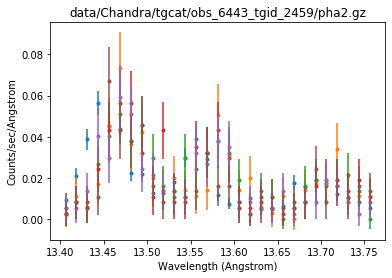

In [244]:
ui.set_analysis('wave')
ui.ignore(None, 13.40)
ui.ignore(13.75, None)
ui.notice(13.40, 13.75)

ui.plot_data('6443_leg-1')
for i in range(5):
    ui.plot_data('t6443_{}_leg-1'.format(i), overplot=True)

In [246]:
ui.set_analysis('6443_leg-1', "energy", "counts", 0)

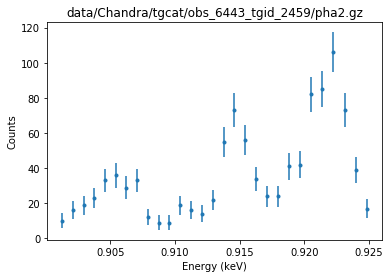

In [247]:
ui.plot_data('6443_leg-1')

In [251]:
pl = ui.get_data_plot('6443_leg-1')

In [253]:
pl.y.sum()

1051.0

627.0


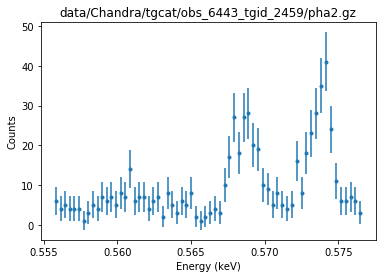

In [254]:
ui.set_analysis('wave')
ui.ignore(None, 21.5)
ui.ignore(22.3, None)
ui.notice(21.5, 22.3)
ui.set_analysis('6443_leg-1', "energy", "counts", 0)
pl = ui.get_data_plot('6443_leg-1')
ui.plot_data('6443_leg-1')
print(pl.y.sum())